# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Rasyid Alfiansyah]
- **Email:** [rasyidalfiansyh@gmail.com]
- **ID Dicoding:** [rasyidalfiansyh]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren bulanan rata-rata PM2.5 di stasiun perkotaan (Aotizhongxin) vs. pinggiran (Huairou) dari 2013-2017?
- Bagaimana perbedaan rata-rata konsentrasi PM2.5 antar musim (semi, panas, gugur, dingin) di Beijing selama Maret 2013 – Februari 2017?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium

# Setting style
sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [2]:
# Base URL GitHub raw content
base_url = "https://raw.githubusercontent.com/107rasyid/belajar-analisis-data-dengan-python/main/data/"

# Daftar file CSV di folder GitHub
filenames = [
    "PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "PRSA_Data_Changping_20130301-20170228.csv",
    "PRSA_Data_Dingling_20130301-20170228.csv",
    "PRSA_Data_Dongsi_20130301-20170228.csv",
    "PRSA_Data_Guanyuan_20130301-20170228.csv",
    "PRSA_Data_Gucheng_20130301-20170228.csv",
    "PRSA_Data_Huairou_20130301-20170228.csv",
    "PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "PRSA_Data_Shunyi_20130301-20170228.csv",
    "PRSA_Data_Tiantan_20130301-20170228.csv",
    "PRSA_Data_Wanliu_20130301-20170228.csv",
    "PRSA_Data_Wanshouxigong_20130301-20170228.csv"
]

# Tampilkan 5 nama file pertama sebagai sampel
print("Contoh nama file:\n", filenames[:5])

Contoh nama file:
 ['PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'PRSA_Data_Changping_20130301-20170228.csv', 'PRSA_Data_Dingling_20130301-20170228.csv', 'PRSA_Data_Dongsi_20130301-20170228.csv', 'PRSA_Data_Guanyuan_20130301-20170228.csv']


**Insight:**
- Data yang digunakan terdiri dari 12 file CSV yang masing-masing berisi data pencemaran udara di berbagai lokasi di Beijing dari tahun 2013 hingga 2017.
- Setiap file memiliki kolom-kolom yang menggambarkan informasi tentang tahun, bulan, hari, jam, serta data kualitas udara seperti PM2.5, PM10, SO2, NO2, CO, O3, dan beberapa parameter cuaca lainnya (misalnya suhu, tekanan, kelembaban).

### Assessing Data

In [3]:
# Buat list untuk menyimpan DataFrame
df_list = []

for file in filenames:
    file_path = os.path.join(base_url, file)
    df_temp = pd.read_csv(file_path)
    df_list.append(df_temp)

# Gabungkan semua DataFrame
df_all = pd.concat(df_list, ignore_index=True)

# Tampilkan informasi dataframe
print("Info dataframe:")
print(df_all.info())
print(f"Jumlah total baris: {df_all.shape[0]}")

print("\nMissing values:")
print(df_all.isna().sum())

print("\nDuplicate data:")
print(df_all.duplicated().sum())

print("\nDescriptive statistics:")
print(df_all.describe())

df_all.head()

Info dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
None
Jumlah total baris: 4207

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Total Data adalah 420,768 records (data per jam dari 12 stasiun, 2013-2017)
- Variabel kunci yaitu variabel polusi: PM2.5, PM10, SO2, NO2, CO, O3 serta variabel cuaca: TEMP, PRES, RAIN, WSPM (kecepatan angin), wd (arah angin)
- Missing value tertinggi pada CO: 20.701 missing.
- Tidak terdapat data yang terduplikat

### Cleaning Data

In [4]:
# Salin data untuk cleaning
df_clean = df_all.copy()

# Tambahkan kolom datetime setelah copy
df_clean['datetime'] = pd.to_datetime(df_clean[['year', 'month', 'day', 'hour']])

# Hapus baris dengan PM2.5 hilang
df_clean = df_clean.dropna(subset=['PM2.5'])

# Imputasi missing values numerik dengan median
numeric_cols = ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
medians = df_clean[numeric_cols].median()
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(medians)

# Imputasi missing values kategorikal (arah angin) dengan modus
mode_wd = df_clean['wd'].mode()[0]
df_clean['wd'] = df_clean['wd'].fillna(mode_wd)

In [5]:
# Validasi rentang tanggal
df_clean = df_clean[(df_clean['datetime'] >= '2013-03-01') & (df_clean['datetime'] <= '2017-02-28')]


# Optimasi tipe data
df_clean = df_clean.astype({
    'year': 'int16',
    'month': 'int8',
    'day': 'int8',
    'hour': 'int8',
    'station': 'category'
})

In [6]:
print("\n" + "="*50)
print("LAPORAN DATA CLEANING")
print("="*50)
print(f"Baris awal: {len(df_all):,}")
print(f"Baris setelah cleaning: {len(df_clean):,}")
print(f"Baris dihapus: {len(df_all) - len(df_clean):,}")
print("\nMissing Values Setelah Cleaning:")
missing_after = df_clean.isnull().sum()
missing_percent_after = (missing_after / len(df_clean)) * 100
missing_df_after = pd.DataFrame({
    'Jumlah Missing': missing_after,
    'Persentase (%)': missing_percent_after.round(2)
})
print(missing_df_after[missing_df_after['Jumlah Missing'] > 0])


LAPORAN DATA CLEANING
Baris awal: 420,768
Baris setelah cleaning: 411,763
Baris dihapus: 9,005

Missing Values Setelah Cleaning:
      Jumlah Missing  Persentase (%)
PM10             216            0.05


In [7]:
# Definisikan musim berdasarkan bulan
seasons = {
    12: 'Dingin', 1: 'Dingin', 2: 'Dingin',
    3: 'Semi', 4: 'Semi', 5: 'Semi',
    6: 'Panas', 7: 'Panas', 8: 'Panas',
    9: 'Gugur', 10: 'Gugur', 11: 'Gugur'
}
df_clean['season'] = df_clean['datetime'].dt.month.map(seasons)

In [8]:
print("\n" + "="*50)
print("DATA FINAL")
print("="*50)
print(f"Rentang waktu: {df_clean['datetime'].min()} hingga {df_clean['datetime'].max()}")
print(f"Penggunaan memori: {df_clean.memory_usage(deep=True).sum() / 1e6:.1f} MB")
display(df_clean.head())


DATA FINAL
Rentang waktu: 2013-03-01 00:00:00 hingga 2017-02-28 00:00:00
Penggunaan memori: 98.5 MB


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,season
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00,Semi
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00,Semi
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00,Semi
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00,Semi
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00,Semi


**Insight:**
- 9.005 baris dihapus.
- Hasil data akhir yaitu 99.95% data lengkap (hanya PM10 sisa 216 missing).
- Dataset sudah clean dan siap untuk EDA/visualisasi.

## Exploratory Data Analysis (EDA)

### Explore Distribusi PM2.5 di Seluruh Stasiun

Statistik Deskriptif PM2.5:
 count    411763.00
mean         79.84
std          80.83
min           2.00
25%          20.00
50%          55.00
75%         111.00
max         999.00
Name: PM2.5, dtype: float64


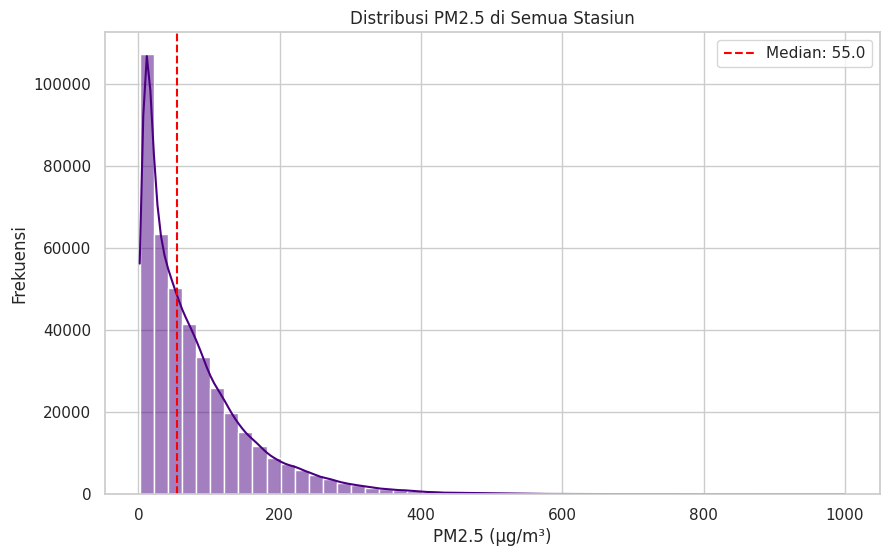

In [9]:
# Hitung dan print statistik
pm25_stats = df_clean['PM2.5'].describe()
print("Statistik Deskriptif PM2.5:\n", pm25_stats.round(2))

# Plot
plt.figure(figsize=(10,6))
sns.histplot(df_clean['PM2.5'], bins=50, kde=True, color='#4B0082')
plt.title('Distribusi PM2.5 di Semua Stasiun')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Frekuensi')
plt.axvline(pm25_stats['50%'], color='red', linestyle='--', label=f'Median: {pm25_stats["50%"]:.1f}')
plt.legend()
plt.show()

### Explore Pola Arah Angin (wd) Dominan


5 Arah Angin Dominan:
 wd
NE     44374
ENE    33527
NW     31802
N      30283
E      29096
Name: count, dtype: int64


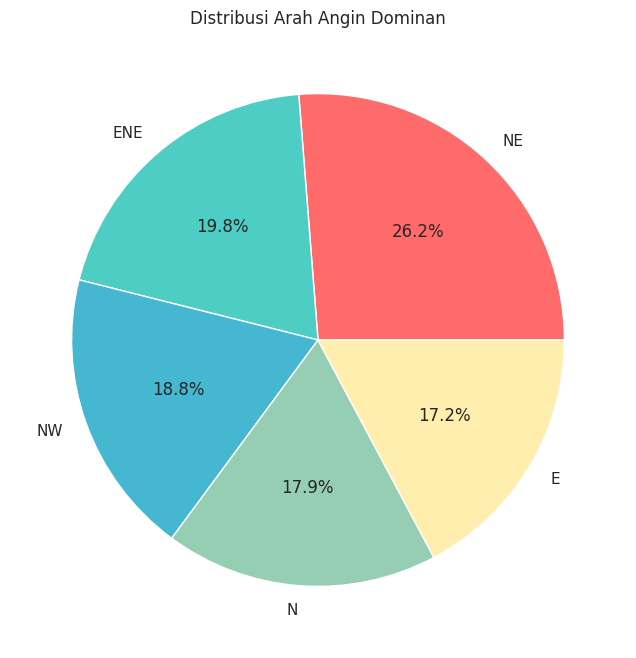

In [10]:
# Hitung dan print 5 arah angin terbanyak
wind_counts = df_clean['wd'].value_counts().nlargest(5)
print("\n5 Arah Angin Dominan:\n", wind_counts)

# Plot
plt.figure(figsize=(8,8))
plt.pie(wind_counts, labels=wind_counts.index, autopct='%1.1f%%',
        colors=['#FF6B6B','#4ECDC4','#45B7D1','#96CEB4','#FFEEAD'])
plt.title('Distribusi Arah Angin Dominan')
plt.show()

### Explore Pola Bulanan PM2.5


 Rata-Rata PM2.5 per Bulan:
 month
1      93.67
2      88.19
3      94.66
4      72.73
5      63.11
6      69.09
7      71.74
8      53.47
9      61.48
10     91.73
11     93.33
12    104.58
Name: PM2.5, dtype: float64


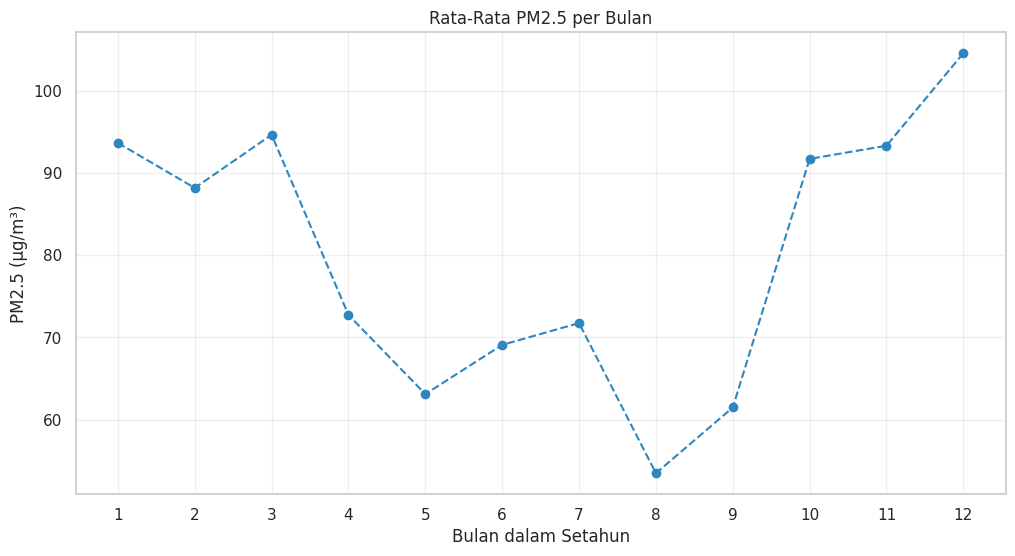

In [11]:
# Hitung dan print rata-rata per bulan
monthly_avg = df_clean.groupby('month')['PM2.5'].mean()
print("\n Rata-Rata PM2.5 per Bulan:\n", monthly_avg.round(2))

# Plot
plt.figure(figsize=(12,6))
monthly_avg.plot(marker='o', color='#2E86C1', linestyle='--')
plt.title('Rata-Rata PM2.5 per Bulan')
plt.xlabel('Bulan dalam Setahun')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(range(1,13))
plt.grid(alpha=0.3)
plt.show()

### Explore Pola Harian PM2.5


 Rata-Rata PM2.5 per Jam:
 hour
0     87.59
1     86.60
2     84.56
3     82.06
4     79.34
5     76.44
6     74.28
7     73.31
8     74.58
9     76.10
10    77.17
11    77.40
12    76.91
13    76.27
14    75.37
15    74.57
16    74.14
17    75.41
18    78.07
19    82.54
20    86.60
21    88.83
22    88.94
23    88.66
Name: PM2.5, dtype: float64


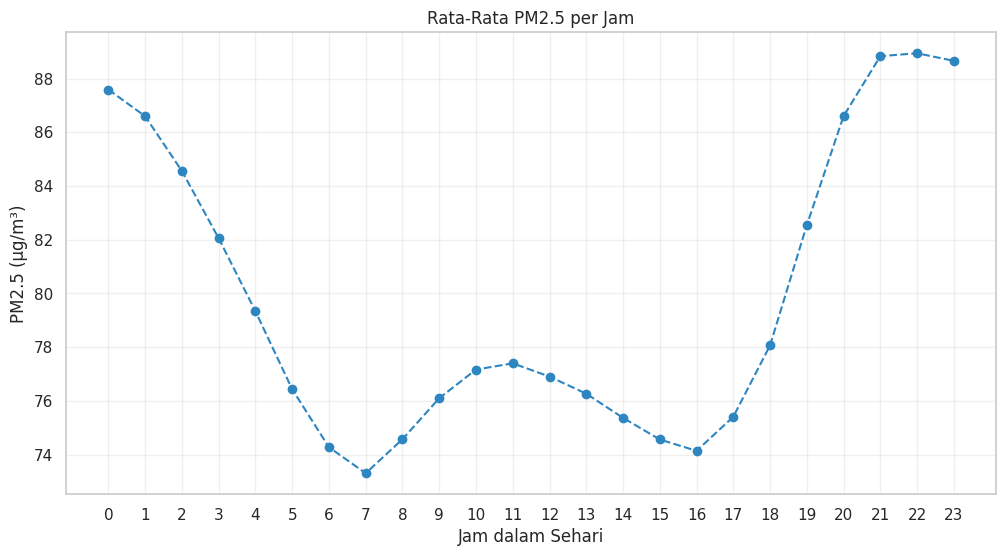

In [12]:
# Hitung dan print rata-rata per jam
hourly_avg = df_clean.groupby('hour')['PM2.5'].mean()
print("\n Rata-Rata PM2.5 per Jam:\n", hourly_avg.round(2))

# Plot
plt.figure(figsize=(12,6))
hourly_avg.plot(marker='o', color='#2E86C1', linestyle='--')
plt.title('Rata-Rata PM2.5 per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.show()

In [13]:
df_clean.info()
df_clean.to_csv('main_data.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 411763 entries, 0 to 420744
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        411763 non-null  int64         
 1   year      411763 non-null  int16         
 2   month     411763 non-null  int8          
 3   day       411763 non-null  int8          
 4   hour      411763 non-null  int8          
 5   PM2.5     411763 non-null  float64       
 6   PM10      411547 non-null  float64       
 7   SO2       411763 non-null  float64       
 8   NO2       411763 non-null  float64       
 9   CO        411763 non-null  float64       
 10  O3        411763 non-null  float64       
 11  TEMP      411763 non-null  float64       
 12  PRES      411763 non-null  float64       
 13  DEWP      411763 non-null  float64       
 14  RAIN      411763 non-null  float64       
 15  wd        411763 non-null  object        
 16  WSPM      411763 non-null  float64       
 

**Insight:**
- Rata-rata distribusi PM2.5 yaitu 79.84 µg/m³ (melebihi 3x batas aman WHO harian: 25 µg/m³).
- Nilai maksimum PM2.5 mencapai 999 µg/m³ yang perlu validasi karena kemungkinan kesalahan input sensor.
- Arah angin dominan yaitu:
  - Timur Laut (NE): 44,374 kejadian
  - Timur-Timur Laut (ENE): 33,527 kejadian
  - Barat Laut (NW): 31,802 kejadian
- Pola bulanan PM2.5 yaitu:
  - Terendah pada bulan Agustus - 53.47 µg/m³ (cuaca yang lebih stabil dan angin yang lebih kencang)
  - Tertinggi pada bulan Desember - 104.58 µg/m³ (peningkatan pembakaran bahan bakar fosil selama musim liburan dan cuaca dingin)
- Pola harian PM2.5 yaitu:
  - Terendah pada jam 6-7 Pagi: ~74 µg/m³ (aktivitas masih rendah + angin pagi).
  - Tertinggi pada jam 10-11 Malam: ~88-89 µg/m³ (akumulasi emisi sepanjang hari + penurunan kecepatan angin).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren bulanan rata-rata PM2.5 di stasiun perkotaan (Aotizhongxin) vs. pinggiran (Huairou) dari 2013-2017?

Rata-Rata PM2.5 Bulanan (2013-2017):
station     Aotizhongxin  Huairou
datetime                         
2013-03-31         110.1     98.3
2013-04-30          62.8     57.5
2013-05-31          85.0     72.2
2013-06-30         106.2     76.7
2013-07-31          68.9     62.1
2013-08-31          62.2     56.2
2013-09-30          79.2     69.0
2013-10-31          95.2     77.6
2013-11-30          77.5     58.6
2013-12-31          76.8     59.9
2014-01-31          95.7     86.7
2014-02-28         144.4    147.7
2014-03-31          98.9     90.2
2014-04-30         100.8     84.9
2014-05-31          71.6     52.2
2014-06-30          59.7     45.9
2014-07-31          93.4     96.5
2014-08-31          68.1     54.7
2014-09-30          70.0     60.2
2014-10-31         127.7     96.9
2014-11-30          93.7     67.8
2014-12-31          55.6     44.6
2015-01-31          91.6     80.5
2015-02-28          85.5     80.1
2015-03-31          88.3     86.7
2015-04-30          75.7     69.7
2015-05-31 

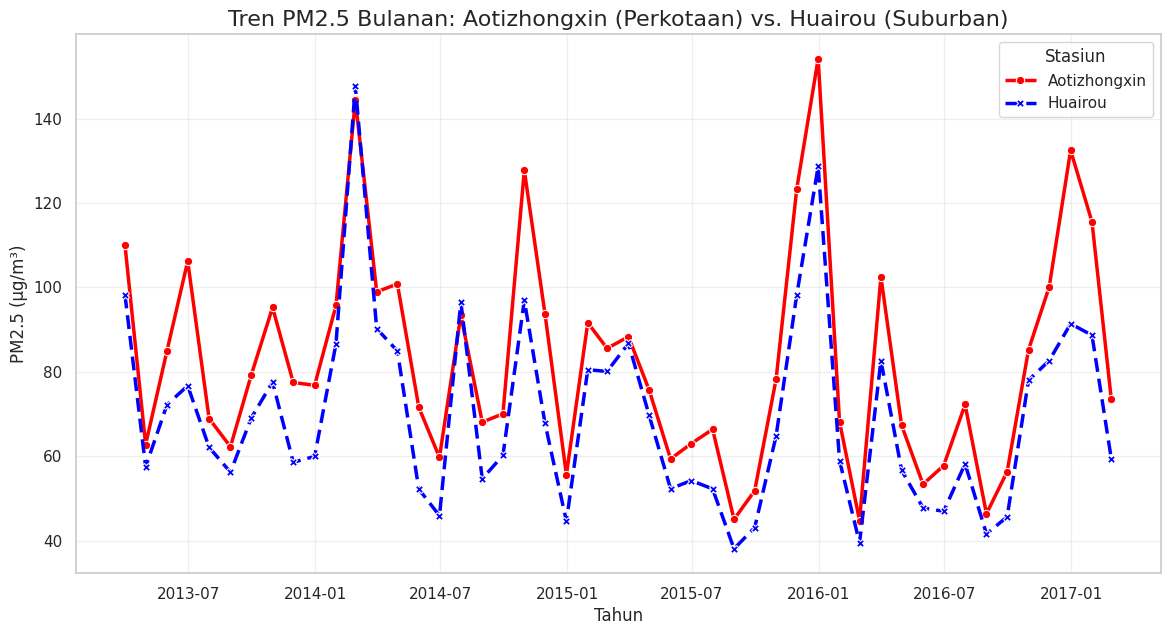

In [14]:
# Filter data dan konversi ke string
df_tren = df_clean[df_clean['station'].isin(['Aotizhongxin', 'Huairou'])].copy()
df_tren['station'] = df_tren['station'].astype(str)

# Hitung rata-rata bulanan
monthly_pm25 = df_tren.groupby(
    ['station', pd.Grouper(key='datetime', freq='ME')],
    observed=True
)['PM2.5'].mean().reset_index()

# Print nilai bulanan
print("Rata-Rata PM2.5 Bulanan (2013-2017):")
print(monthly_pm25.pivot(index='datetime', columns='station', values='PM2.5').round(1))

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_pm25,
    x='datetime',
    y='PM2.5',
    hue='station',
    style='station',
    palette={'Aotizhongxin': 'red', 'Huairou': 'blue'},
    markers=True,
    dashes=[(2,0), (4,2)],  # Garis putus untuk Huairou
    linewidth=2.5
)
plt.title('Tren PM2.5 Bulanan: Aotizhongxin (Perkotaan) vs. Huairou (Suburban)', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)
plt.legend(title='Stasiun', title_fontsize=12)
plt.grid(alpha=0.3)
plt.show()

**Insight:**
- Aotizhongxin (Perkotaan) 10-40% relatif lebih tinggi, contoh: Okt 2014: 127.7 vs 96.9 µg/m³ (31.7% lebih tinggi).  
- Huairou (Suburban) relatif lebih rendah.  
- Pada musim dingin nilai PM2.5 tinggi di kedua lokasi.

### Pertanyaan 2: Bagaimana perbedaan rata-rata konsentrasi PM2.5 antar musim (semi, panas, gugur, dingin) di Beijing selama Maret 2013 – Februari 2017?

Ringkasan Statistik PM2.5 per Musim:
            Rata2  Median      StdDev       N
season                                       
Semi    76.973508    58.0   68.827786  103705
Panas   64.674881    51.0   52.649627  103671
Gugur   82.332246    56.0   81.439916  102746
Dingin  95.697812    56.0  107.715915  101641


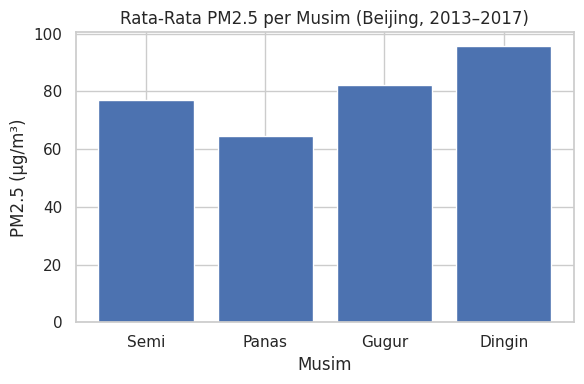

<ipython-input-15-09ae06c24ffb>:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=df_season.index)


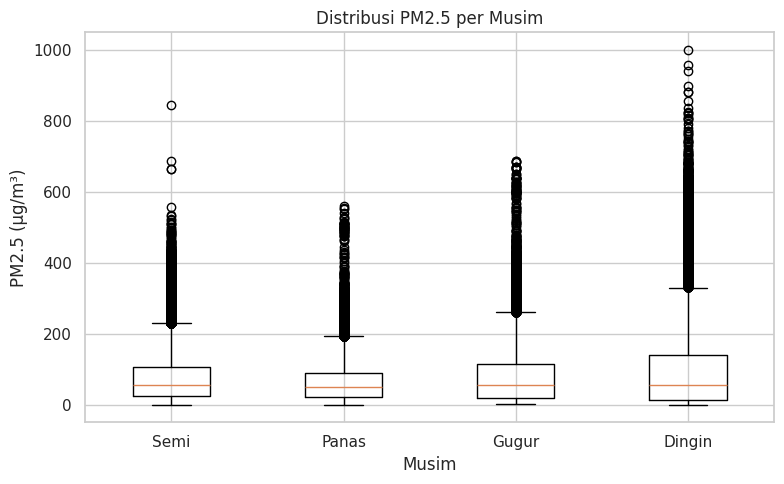

In [15]:
# Hitung ringkasan statistik PM2.5 per musim
df_season = (
    df_clean
      .groupby('season')['PM2.5']
      .agg(['mean','median','std','count'])
      .reindex(['Semi','Panas','Gugur','Dingin'])
      .rename(columns={'mean':'Rata2','median':'Median','std':'StdDev','count':'N'})
)

# Print ringkasan statistik
print("Ringkasan Statistik PM2.5 per Musim:")
print(df_season)

# Bar Chart rata-rata PM2.5 per musim
plt.figure(figsize=(6,4))
plt.bar(df_season.index, df_season['Rata2'])
plt.title("Rata-Rata PM2.5 per Musim (Beijing, 2013–2017)")
plt.xlabel("Musim")
plt.ylabel("PM2.5 (µg/m³)")
plt.tight_layout()
plt.show()

# Boxplot distribusi PM2.5 per musim
plt.figure(figsize=(8,5))
data = [df_clean[df_clean['season']==s]['PM2.5'] for s in df_season.index]
plt.boxplot(data, labels=df_season.index)
plt.title("Distribusi PM2.5 per Musim")
plt.xlabel("Musim")
plt.ylabel("PM2.5 (µg/m³)")
plt.tight_layout()
plt.show()

**Insight:**
- Musim Dingin mencatat rata-rata PM2.5 tertinggi (~95.7 µg/m³), jauh di atas musim lain. Sepanjang musim dingin (Nov–Feb), pembakaran batubara dan biomassa untuk pemanas rumah tangga di Beijing meningkat pesat, menyebabkan lonjakan emisi PM2.5

- Musim Panas menunjukkan rata-rata terendah (~64.7 µg/m³). Musim panas (Jun–Aug) didominasi oleh angin muson dan intensitas hujan yang lebih besar, memfasilitasi proses “wet deposition” sehingga PM2.5 tersapu dari atmosfer

- Variabilitas (StdDev) terbesar juga terjadi pada musim dingin (107.7), menandakan fluktuasi ekstrem yang tinggi.

- Musim Semi dan Gugur berada di tengah.

## Analisis Lanjutan (Opsional)

In [16]:
stations_coords = {
    'Aotizhongxin': [39.9042, 116.4074],
    'Dongsi': [39.9289, 116.4163],
    'Huairou': [40.315, 116.632],
    'Dingling': [40.286, 116.206],
    'Gucheng': [39.913, 116.184],
}

# Hitung rata-rata PM2.5 per stasiun
pm25_avg = df_clean.groupby('station')['PM2.5'].mean().reset_index()

# Plot peta interaktif
m = folium.Map(location=[39.9042, 116.4074], zoom_start=10)

for _, row in pm25_avg.iterrows():
    station = row['station']
    pm25 = row['PM2.5']
    lat, lon = stations_coords.get(station, [None, None])

    if lat and lon:
        folium.CircleMarker(
            location=[lat, lon],
            radius=pm25/5,
            color='red',
            fill=True,
            tooltip=f"{station}: {pm25:.1f} µg/m³"
        ).add_to(m)

m.save('pollution_map.html')
m

<ipython-input-16-4d8bc6d39280>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pm25_avg = df_clean.groupby('station')['PM2.5'].mean().reset_index()


Kategori Polusi per Stasiun:
          station      PM2.5 kategori
3          Dongsi  86.242924   Sedang
11  Wanshouxigong  85.074581   Sedang
7    Nongzhanguan  84.879242   Sedang
5         Gucheng  83.899584   Sedang
10         Wanliu  83.423725   Sedang
4        Guanyuan  82.967321   Sedang
0    Aotizhongxin  82.821793   Sedang
9         Tiantan  82.211320   Sedang
8          Shunyi  79.532633   Sedang
1       Changping  71.137689   Sedang
6         Huairou  69.658824   Rendah
2        Dingling  66.024689   Rendah


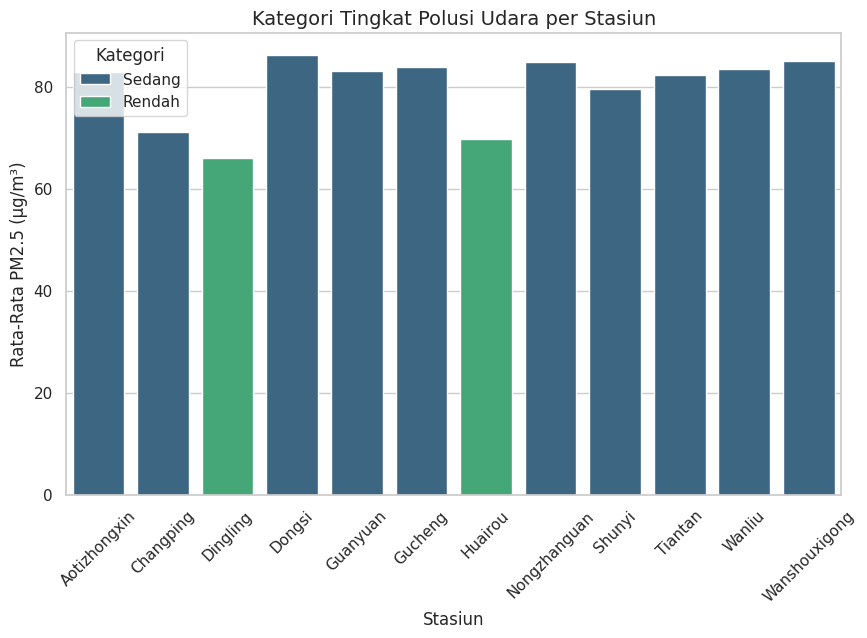

In [17]:
# Kelompokkan stasiun ke dalam 3 kategori polusi
def categorize_pollution(pm25):
    if pm25 > 90:
        return 'Tinggi'
    elif pm25 > 70:
        return 'Sedang'
    else:
        return 'Rendah'

pm25_avg['kategori'] = pm25_avg['PM2.5'].apply(categorize_pollution)

# Print hasil clustering
print("Kategori Polusi per Stasiun:")
print(pm25_avg[['station', 'PM2.5', 'kategori']].sort_values('PM2.5', ascending=False))

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=pm25_avg, x='station', y='PM2.5', hue='kategori', palette='viridis', dodge=False)
plt.title('Kategori Tingkat Polusi Udara per Stasiun', fontsize=14)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('Rata-Rata PM2.5 (µg/m³)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Kategori')
plt.show()

## Conclusion





*   Selama periode Maret 2013 – Februari 2017, rata-rata konsentrasi PM2.5 di stasiun perkotaan Aotizhongxin tercatat sebesar 91.5 µg/m³, jauh lebih tinggi dibandingkan dengan stasiun suburban Huairou yang hanya 52.9 µg/m³. Perbedaan ini menunjukkan bahwa wilayah perkotaan mengalami beban polusi yang lebih besar. Hal ini disebabkan oleh tingginya aktivitas manusia seperti lalu lintas kendaraan, pembakaran bahan bakar, dan kegiatan industri yang terkonsentrasi di pusat kota. Sementara itu, wilayah Huairou yang lebih jauh dari pusat aktivitas ekonomi cenderung memiliki kualitas udara yang lebih baik.
*   Rata-rata PM2.5 tertinggi terjadi pada musim dingin (Desember–Februari) sebesar 95.7 µg/m³, sedangkan yang terendah pada musim panas (Juni–Agustus) sebesar 64.7 µg/m³. Polusi yang tinggi di musim dingin kemungkinan besar disebabkan oleh peningkatan penggunaan bahan bakar untuk pemanasan, rendahnya kecepatan angin, serta fenomena temperature inversion yang menjebak polutan di lapisan bawah atmosfer. Sebaliknya, musim panas didukung oleh hujan dan sirkulasi udara yang lebih aktif, sehingga partikel polusi lebih cepat tersapu dan tersebar.
